In [2]:
import tensorflow as tf
import numpy as np

# Define the system dynamics
def system_dynamics(x):
    x1_dot = -x[0]**3
    x2_dot = -x[1]
    return np.array([x1_dot, x2_dot])

# Define the Lyapunov function candidate
def lyapunov_function(x):
    return 0.5 * x[0]**4 + 0.5 * x[1]**2

# Generate training data
def generate_data(num_samples=100000):
    X = np.random.uniform(-1, 1, (num_samples, 2))
    Y = np.array([lyapunov_function(x) for x in X])
    return X, Y

X_train, Y_train = generate_data()

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',metrics=['mean_absolute_error'])

# Train the model
history=model.fit(X_train, Y_train, epochs=50, batch_size=64)

# Evaluate the model (optional)
# X_test, Y_test = generate_data(num_samples=1000)
# model.evaluate(X_test, Y_test)

Epoch 1/50
1563/1563 [==============================] - 11s 3ms/step - loss: 8.4243e-04 - mean_absolute_error: 0.0100
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2484e-05 - mean_absolute_error: 0.0024
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0183e-05 - mean_absolute_error: 0.0029
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2008e-05 - mean_absolute_error: 0.0023
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7916e-05 - mean_absolute_error: 0.0025
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6199e-05 - mean_absolute_error: 0.0023
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1752e-05 - mean_absolute_error: 0.0021
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2734e-05 - mean_absolute_error: 0.0022
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/

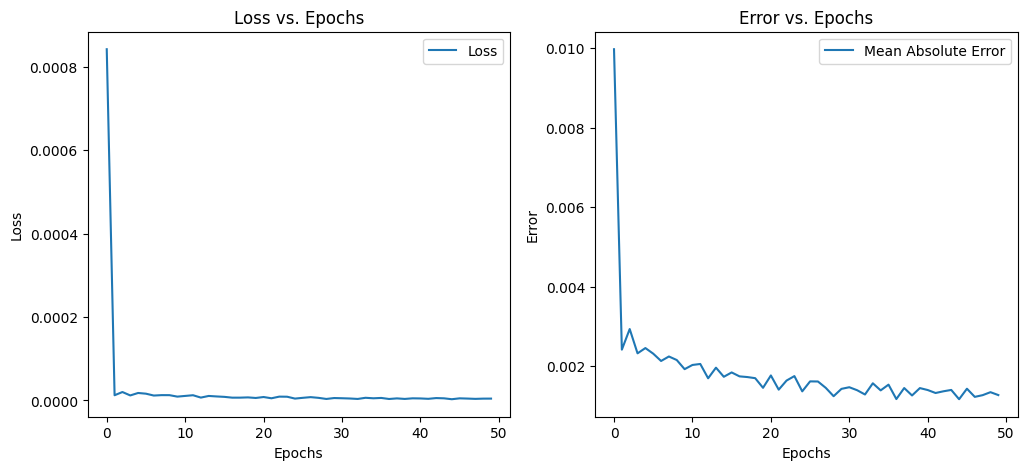

In [3]:
import matplotlib.pyplot as plt

# Plotting Loss Function vs. Epochs
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# If you have other metrics like accuracy, you can plot them here
# For example, if you were tracking mean absolute error:
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Mean Absolute Error')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

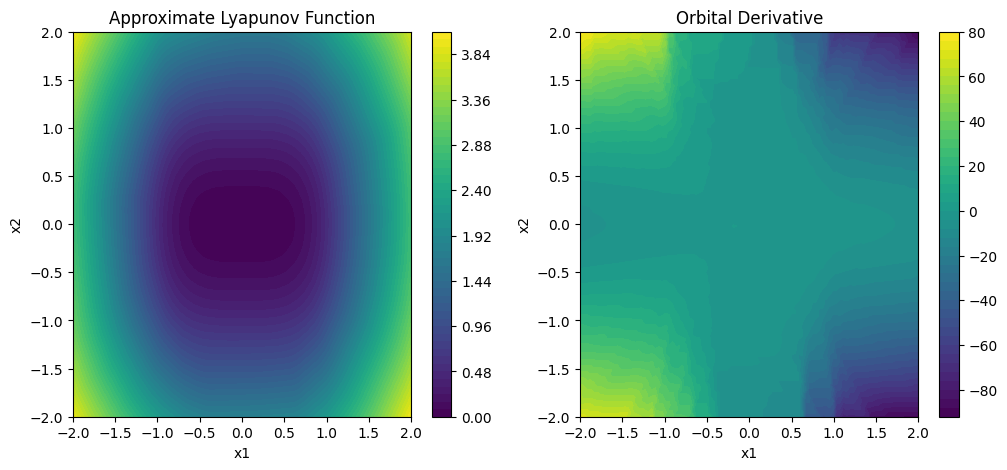

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the system dynamics for Example 1
def system_dynamics(x):
    x1_dot = -x[:, 0] - 10 * x[:, 1]**2
    x2_dot = -2 * x[:, 1]
    return tf.stack([x1_dot, x2_dot], axis=-1)

# Build and train the neural network model
# [Assuming the model is already built and trained]

# Define the orbital derivative of the Lyapunov function
def orbital_derivative(x, model):
    with tf.GradientTape() as tape:
        tape.watch(x)
        V = model(x)
    dV_dx = tape.gradient(V, x)
    f_x = system_dynamics(x)
    return tf.reduce_sum(dV_dx * f_x, axis=1)

# Function to plot the approximate Lyapunov function and its derivative
def plot_lyapunov_and_derivative(model, resolution=100):
    x_range = np.linspace(-2, 2, resolution)
    X1, X2 = np.meshgrid(x_range, x_range)
    W = np.zeros_like(X1)
    dW = np.zeros_like(X1)

    for i in range(resolution):
        for j in range(resolution):
            x = tf.convert_to_tensor([[X1[i, j], X2[i, j]]], dtype=tf.float32)
            W[i, j] = model(x).numpy()[0, 0]
            dW[i, j] = orbital_derivative(x, model).numpy()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contourf(X1, X2, W, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Approximate Lyapunov Function')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.subplot(1, 2, 2)
    plt.contourf(X1, X2, dW, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Orbital Derivative')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

# Plot the functions
plot_lyapunov_and_derivative(model)